In [2]:
# Preprocess data and plot
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# from collections import OrderedDict
# import os
# import sys

# AVERAGE_CHILDREN_BY_AGE = pd.read_excel("Births and Fertility.xlsx", sheet_name="T1")
AVERAGE_CHILDREN_BY_EDUCATION = pd.read_excel("Births and Fertility.xlsx", sheet_name="T2")
BIRTHS_AND_FERTILITY = pd.read_excel("Births and Fertility.xlsx", sheet_name="T3")
# AVERAGE_CHILDREN = pd.read_excel("Births and Fertility.xlsx", sheet_name="T1")
MARRIAGE_RATE_BY_AGE = pd.read_excel("Marriage.xlsx", sheet_name="T2")

AVERAGE_CHILDREN_BY_EDUCATION = AVERAGE_CHILDREN_BY_EDUCATION.iloc[5:12, 1:]
BIRTHS_AND_FERTILITY = BIRTHS_AND_FERTILITY.iloc[4:21, 1:]
MARRIAGE_RATE_BY_AGE = MARRIAGE_RATE_BY_AGE.iloc[4:30, 1:]

## Fertility RATE

In [3]:
#Data cleaning of fertility rate
BIRTHS_AND_FERTILITY.index = range(0,len(BIRTHS_AND_FERTILITY))
BIRTHS_AND_FERTILITY.columns = range(0,59)
BIRTHS_AND_FERTILITY = BIRTHS_AND_FERTILITY.T
BIRTHS_AND_FERTILITY

0     1     2      3      4      5      6     7    8     9     10    11  \
0   1960  5.76  69.6  250.5  323.9  259.7  176.7  70.7   na  5.62  6.42  7.37   
1   1961  5.41  63.4  241.1  304.9  238.4  168.9  64.8   na   5.2  6.42  6.96   
2   1962  5.21    52  245.5  291.7  231.5  156.2  65.1   na  4.92  6.63  6.96   
3   1963  5.16  45.7    249  287.2  228.7  156.1  64.9   na  4.83  6.75   6.9   
4   1964  4.97  38.3    240  277.6  226.7  147.7  62.8   na   4.6  6.78  7.06   
5   1965  4.66  35.9  227.1  259.5  216.2  138.1  54.9   na  4.31  6.31  6.69   
6   1966  4.46    33  218.5  261.2    202  124.8  51.7   na  4.08  6.14  6.61   
7   1967  3.91  35.8  195.8  244.7  166.7   95.9  42.9   na  3.59  5.29  5.62   
8   1968  3.53  30.9  165.8  236.6    152   85.2  35.3   na  3.29  4.52  4.77   
9   1969  3.22  27.1  150.1  227.8  134.3   75.2  29.4   na  3.05  3.78  4.58   
10  1970  3.07  25.9    139  208.8    138   74.5  26.7   na     3  3.45  3.15   
11  1971  3.02  25.6  138.3  212.6  137.6   68.5  21.9   na  2.98  3.25  3.14   
12  1972  3.04  25.3  137.4    218  139.2   66.1  20.9   na     3  3.26  3.08   
13  1973  2.79  24.2  130.5  199.5  128.4   57.6  17.4   na  2.79  2.88  2.61   
14  1974  2.35  20.8  118.9  172.2  102.9   42.6  12.7   na  2.33  2.46   2.3   
15  1975  2.07  16.8  102.1  154.5   94.9   36.3    10   na  2.06  2.12  1.95   
16  1976  2.11  16.2  107.2  160.2   95.9   33.8   8.1   na  2.15  1.93  1.84   
17  1977  1.82  13.4   90.3  138.9   85.2   28.7   6.9   na  1.81  1.87   1.7   
18  1978  1.79  11.8   86.8  140.9   86.8   26.7   5.3   na  1.78  1.83  1.79   
19  1979  1.79  11.4   85.1  139.3   88.4   27.5   5.5   na  1.77  1.84  1.88   
20  1980  1.82  12.7   84.9  144.5   87.8     28   5.8  0.5  1.73   2.2  2.03   
21  1981  1.78  11.8   84.2  141.2   84.2   29.3   5.5  0.4  1.67  2.25  1.97   
22  1982  1.74  11.4   80.2  136.4   84.5     31   4.9  0.3  1.62  2.27  1.93   
23  1983  1.61  10.4   72.4  125.5   79.9   29.5   3.9  0.2  1.47  2.21  1.83   
24  1984  1.62  10.3   68.6  124.2     83   32.1   4.9  0.2  1.46  2.27  1.84   
25  1985  1.61   9.6     68  123.9   85.6   31.1   4.5  0.2  1.46  2.28  1.79   
26  1986  1.43   8.6   60.4  110.1   74.4   28.4   4.7  0.2  1.25  2.22  1.73   
27  1987  1.62   7.7   59.7  124.8   92.5   33.5   5.9  0.2  1.46  2.34  1.76   
28  1988  1.96   7.3     65  147.5  118.9   44.9   7.4    0  1.84  2.51  1.89   
29  1989  1.75   7.2   59.7  129.7  104.5   42.1   7.6  0.2  1.56  2.62  1.92   
30  1990  1.83   8.3   58.7    136  110.8   44.3   7.4  0.1  1.65  2.69  1.89   
31  1991  1.73   8.4   53.5  129.2  106.8   41.7   6.5  0.3  1.54  2.63  1.84   
32  1992  1.72   7.9   52.1  128.4  107.2   41.7   6.7  0.2  1.53  2.61   1.9   
33  1993  1.74   8.3   49.8    130  108.8   43.6   7.2  0.2  1.55  2.62  1.94   
34  1994  1.71   7.4   46.9  129.2  109.2   42.6   6.7  0.1  1.54  2.54  1.81   
35  1995  1.67   6.6   46.9  125.6  107.4   41.3   6.5  0.2  1.51  2.51  1.71   
36  1996  1.66   6.8   44.8  122.8  108.5   42.6     7  0.2   1.5  2.52  1.74   
37  1997  1.61   6.8     42  116.9  107.3   41.7     7  0.2  1.44  2.47  1.71   
38  1998  1.48   7.5   39.7  105.2   96.1   39.8   6.6  0.2  1.27  2.48  1.68   
39  1999  1.47   8.4   37.3  105.1   97.5   38.6   6.4  0.2  1.29  2.41  1.55   
40  2000   1.6   8.8   42.2  110.1  107.9   43.3   7.6  0.2  1.43  2.54  1.59   
41  2001  1.41   8.4   35.7   96.2   94.9   39.5   6.8  0.2  1.21  2.45  1.51   
42  2002  1.37     8   34.6   91.6   96.2   38.2   5.8  0.2  1.19   2.3  1.51   
43  2003  1.27   6.7   32.4   82.2     90   36.3   6.1  0.2  1.09   2.1  1.39   
44  2004  1.26   6.6   32.2   80.6   89.9   35.6   6.3  0.2  1.09  2.07  1.34   
45  2005  1.26   7.2   32.5   80.7   89.2   36.8   6.2  0.2   1.1  2.03  1.29   
46  2006  1.28   6.6   30.6   79.6   93.1   38.7   6.4  0.2  1.11  2.02  1.27   
47  2007  1.29   6.1   31.2   78.7   94.4   41.5   6.4  0.2  1.14  1.94  1.25   
48  2008  1.28   6.1   29.1   78.9   

In [4]:
#add column names and change data type (as Excel file set the datatype as object by default)
FERTILITY_RATE = pd.DataFrame(BIRTHS_AND_FERTILITY[[0,1,9,10,11]])
FERTILITY_RATE.columns=['Year','Total','Chinese','Malay','Indian']
FERTILITY_RATE[['Total','Chinese','Malay','Indian']] = FERTILITY_RATE[['Total','Chinese','Malay','Indian']].astype(float)
FERTILITY_RATE['Year'] = FERTILITY_RATE[['Year']].astype(int)
FERTILITY_RATE.head()
FERTILITY_RATE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
Year       59 non-null int32
Total      59 non-null float64
Chinese    59 non-null float64
Malay      59 non-null float64
Indian     59 non-null float64
dtypes: float64(4), int32(1)
memory usage: 2.2 KB


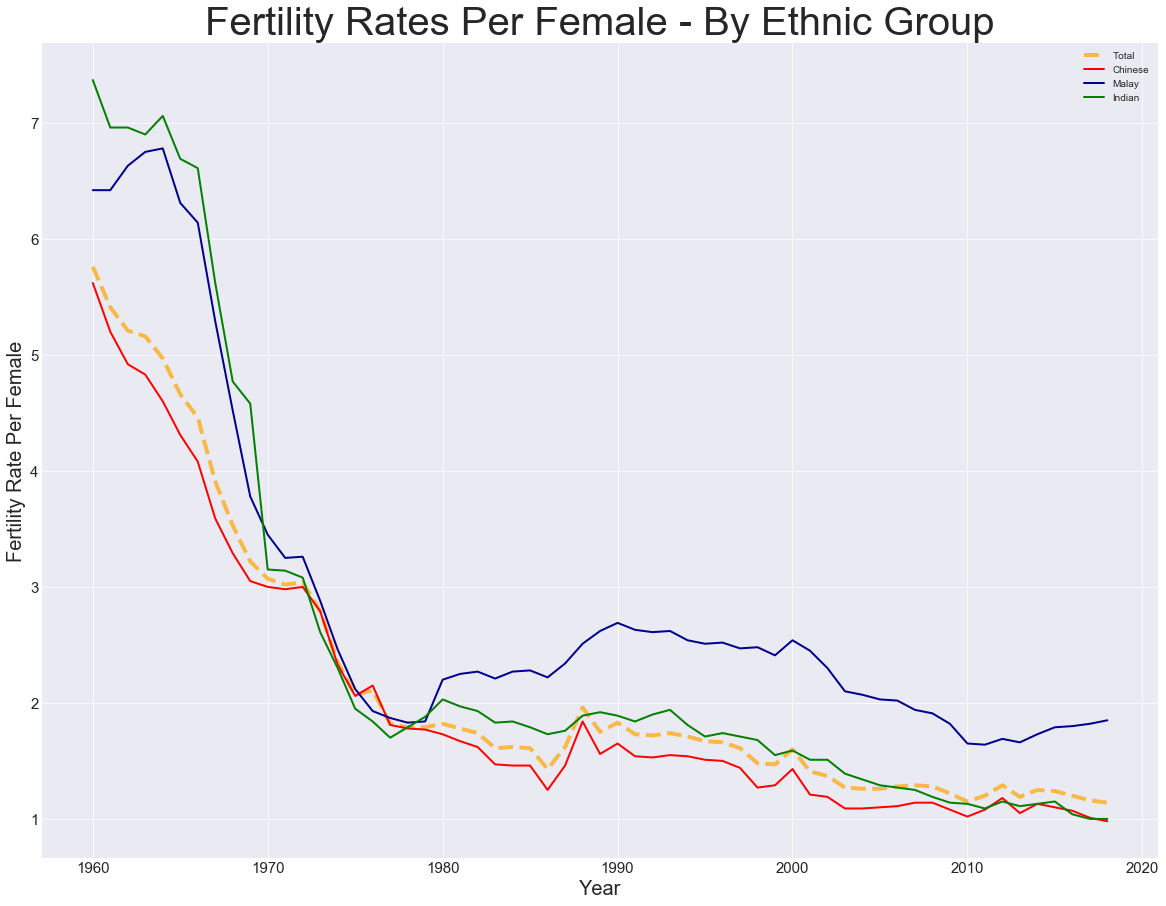

In [27]:
# plot the data (Fertility rate) classified by ethnic group
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20,15))
plt.plot( 'Year', 'Total', data=FERTILITY_RATE, marker='', color='orange', linewidth=4, alpha=0.7, linestyle='dashed')
plt.plot( 'Year', 'Chinese', data=FERTILITY_RATE, marker='', color='red', linewidth=2)
plt.plot( 'Year', 'Malay', data=FERTILITY_RATE, marker='', color='darkblue', linewidth=2)
plt.plot( 'Year', 'Indian', data=FERTILITY_RATE, marker='', color='green', linewidth=2)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Fertility Rate Per Female", fontsize=20)
plt.title("Fertility Rates Per Female - By Ethnic Group", fontsize=40)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend()

We split the test set and train set with the ratio of 1/5. Here we tried to adopt a time-series analysis method - Holt's Trend Method, which can predict the data with trend using simple exponential smooth (SES).

In [28]:
#import holt method
from statsmodels.tsa.api import Holt
FERTILITY_RATE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 1960 to 2018
Data columns (total 5 columns):
Year       59 non-null int32
Total      59 non-null float64
Chinese    59 non-null float64
Malay      59 non-null float64
Indian     59 non-null float64
dtypes: float64(4), int32(1)
memory usage: 2.2 KB


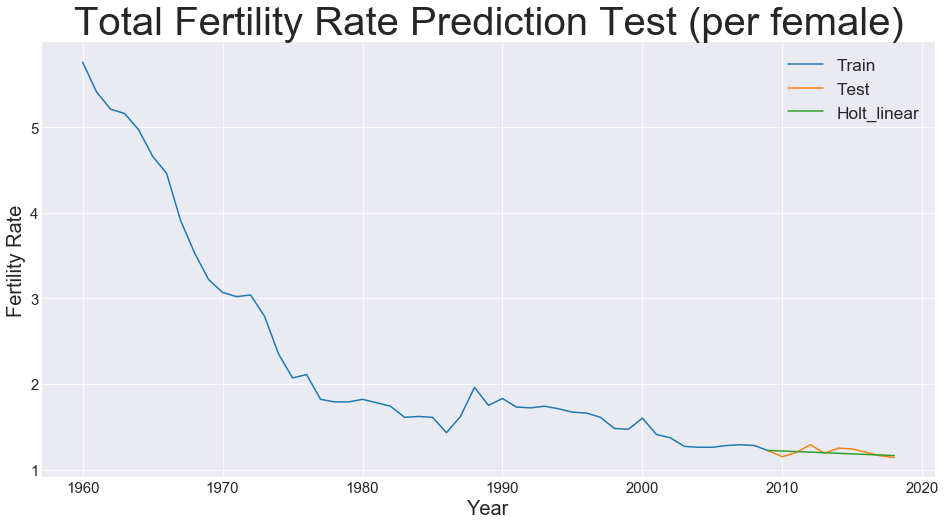

The mean squared error is 0.002020212711940627


In [7]:
#To test the feasibility, we set the latter 1/6 of data as our test data
FERTILITY_RATE.index = range(1960,2019)
train, test = FERTILITY_RATE.iloc[:50], FERTILITY_RATE.iloc[49:]
y_hat_avg = test.copy()
fit1 = Holt(np.asarray(train['Total'])).fit(smoothing_level = 0.4
                                            , smoothing_slope = 0.4)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

#plot
plt.figure(figsize=(16,8))
plt.plot(train['Total'], label='Train')
plt.plot(test['Total'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc ='best', fontsize = 'xx-large')
plt.xlabel("Year", fontsize=20)
plt.ylabel("Fertility Rate", fontsize=20)
plt.title("Total Fertility Rate Prediction Test (per female)", fontsize=40)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()
from sklearn.metrics import mean_squared_error
from math import sqrt
msr = mean_squared_error(test.Total, y_hat_avg.Holt_linear)
print("The mean squared error is", msr)

Here, from observing the green line (predicted test data) and orange line (actual test data), we can see that two lines are actually really close. By calculating the MSE, we can get 0.002

Intercept of Regression 	: b =  [36.87926204]
Coefficients of Regression 	: a =  [[-0.01771164]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8700127513282717
Mean Squared Error (MSE) 	: 0.007705773425308483

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7020259024387521
Mean Squared Error (MSE) 	: 0.022442084698990703



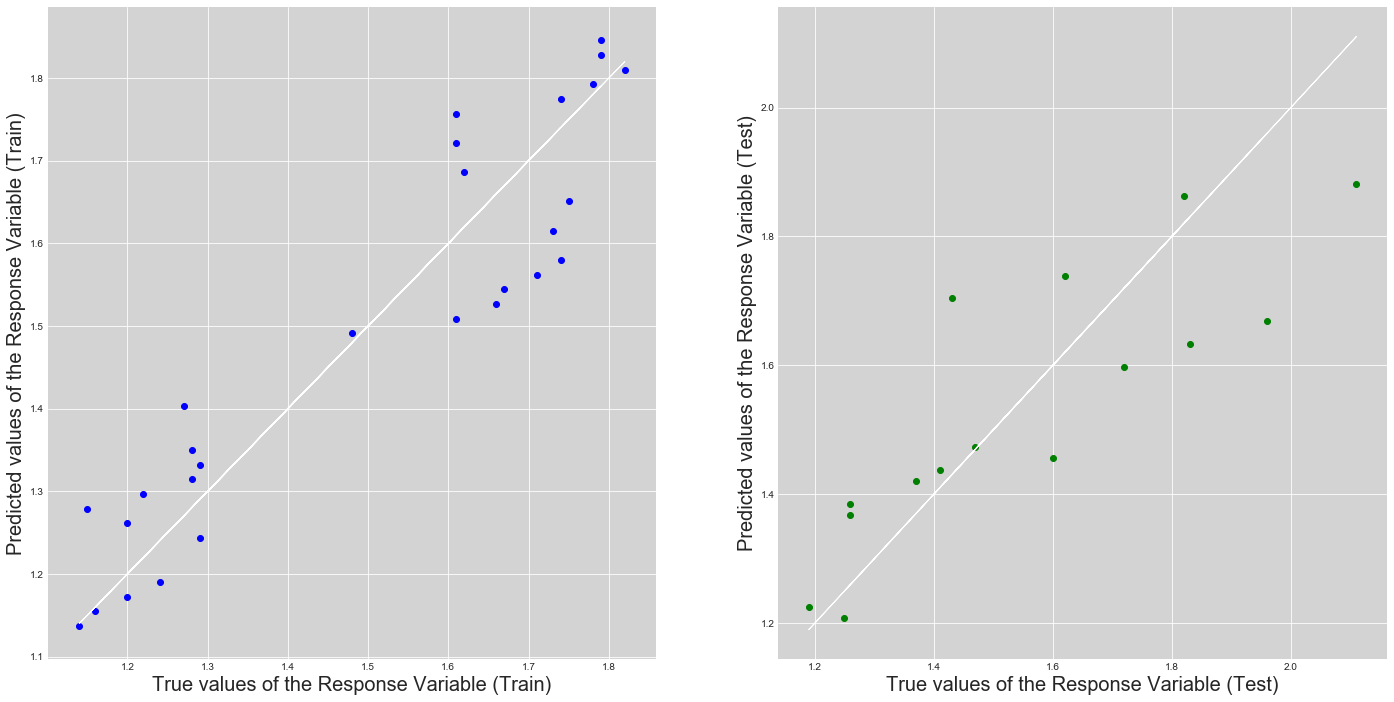

In [30]:
# Where as if we use linear regression method
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#As the data is relatively stable only after 1976, so here, we cut off the data before 1976
FERTILITY_RATE.index = range(0,59)

# Split the Dataset into Train and Test, Train:Test=2:1.
year = pd.DataFrame(FERTILITY_RATE['Year']).iloc[16:]
total = pd.DataFrame(FERTILITY_RATE['Total']).iloc[16:]

X_train, X_test, y_train, y_test = train_test_split(year, total, test_size = 0.33)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)", fontsize=20)
axes[0].set_ylabel("Predicted values of the Response Variable (Train)", fontsize=20)
axes[0].set_facecolor('lightgrey')
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)", fontsize=20)
axes[1].set_ylabel("Predicted values of the Response Variable (Test)", fontsize=20)
axes[1].set_facecolor('lightgrey')
plt.show()

The MSE is about 0.022 if we use linear regression method (although we have dumped the early fluctuant data before 1976). However, for Holt's method, we have the mse of only 0.002. Therefore, here we try to use Holt's linear method with trend factor to proceed our following predictions.

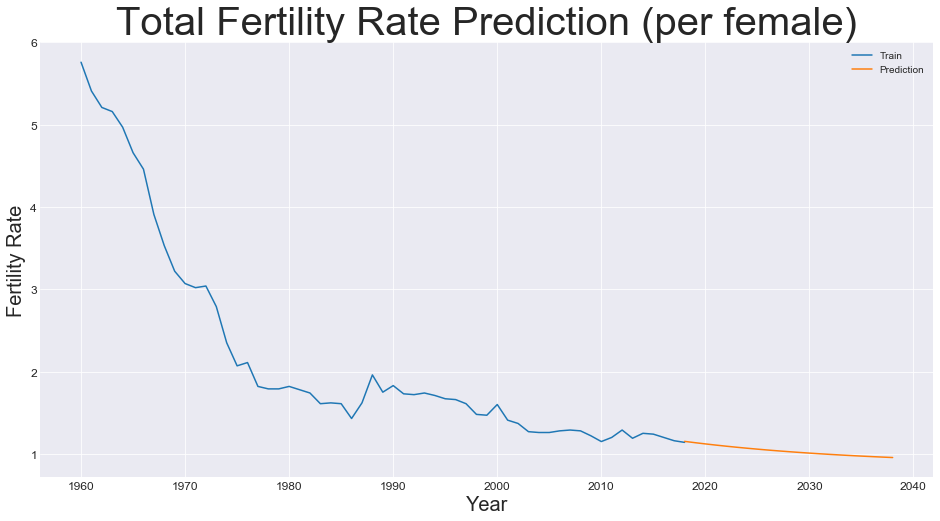

In [31]:
#predict the fertility rate until 2039 using Holt's method
FERTILITY_RATE.index = range(1960,2019)
train = FERTILITY_RATE
fertility_rate_pred = pd.DataFrame()
for i in range(21):
    fertility_rate_pred = fertility_rate_pred.append(['0'])
fertility_rate_pred.columns=['Total']
fertility_rate_pred.index = range(2018,2039)

fit1 = Holt(np.asarray(train['Total']), damped = True).fit(smoothing_level = 0.4,smoothing_slope = 0.4)
fertility_rate_pred['Total'] = fit1.forecast(len(fertility_rate_pred))

plt.figure(figsize=(16,8))
plt.plot(train['Total'], label='Train')
plt.plot(fertility_rate_pred['Total'], label='Prediction')
plt.legend(loc ='best', fontsize = 'x-large')
plt.xlabel("Year", fontsize=20)
plt.ylabel("Fertility Rate", fontsize=20)
plt.title("Total Fertility Rate Prediction (per female)", fontsize=40)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend()

In [39]:
fertility_rate_pred

Total
2018  1.152266
2019  1.136369
2020  1.121340
2021  1.107131
2022  1.093698
2023  1.080998
2024  1.068992
2025  1.057640
2026  1.046909
2027  1.036763
2028  1.027171
2029  1.018103
2030  1.009529
2031  1.001424
2032  0.993761
2033  0.986517
2034  0.979668
2035  0.973192
2036  0.967070
2037  0.961283
2038  0.955811

Here we can see around 2032, fertility rate will eventually fall below 1 child per female if without the proper policy's intervention.

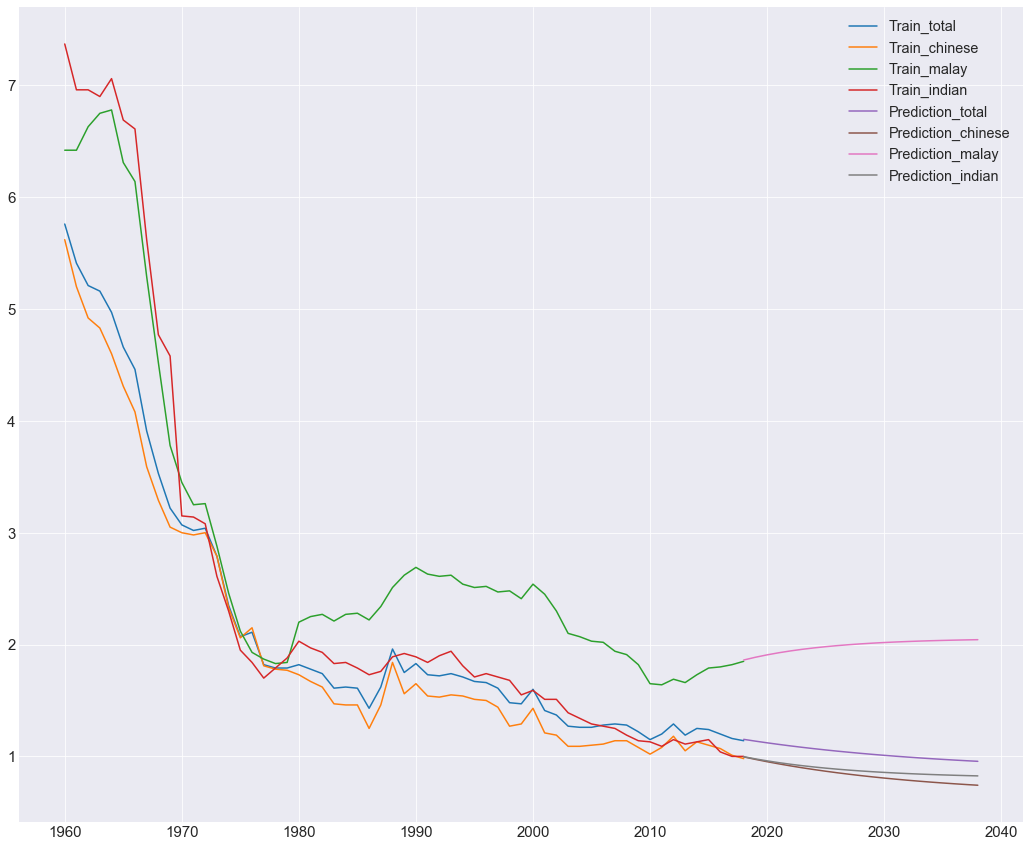

In [41]:
#predict the fertility rate by ethnic group until 2039 using Holt's method
FERTILITY_RATE.index = range(1960,2019)
train = FERTILITY_RATE
fertility_rate_pred = pd.DataFrame(np.random.randn(21,4))
fertility_rate_pred.columns=['Total', 'Chinese', 'Malay', 'Indian']
fertility_rate_pred.index = range(2018,2039)

fit1 = Holt(np.asarray(train['Total']), damped = True).fit(smoothing_level = 0.4,smoothing_slope = 0.4)
fertility_rate_pred['Total'] = fit1.forecast(len(fertility_rate_pred))
fit2 = Holt(np.asarray(train['Chinese']), damped = True).fit(smoothing_level = 0.4,smoothing_slope = 0.4)
fertility_rate_pred['Chinese'] = fit2.forecast(len(fertility_rate_pred))
fit3 = Holt(np.asarray(train['Malay']), damped = True).fit(smoothing_level = 0.4,smoothing_slope = 0.4)
fertility_rate_pred['Malay'] = fit3.forecast(len(fertility_rate_pred))
fit4 = Holt(np.asarray(train['Indian']), damped = True).fit(smoothing_level = 0.4,smoothing_slope = 0.4)
fertility_rate_pred['Indian'] = fit4.forecast(len(fertility_rate_pred))

plt.figure(figsize=(18,15))
plt.plot(train['Total'], label='Train_total')
plt.plot(train['Chinese'], label='Train_chinese')
plt.plot(train['Malay'], label='Train_malay')
plt.plot(train['Indian'], label='Train_indian')
plt.plot(fertility_rate_pred['Total'], label='Prediction_total')
plt.plot(fertility_rate_pred['Chinese'], label='Prediction_chinese')
plt.plot(fertility_rate_pred['Malay'], label='Prediction_malay')
plt.plot(fertility_rate_pred['Indian'], label='Prediction_indian')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc ='best', fontsize = 'x-large')

In [42]:
fertility_rate_pred

Total   Chinese     Malay    Indian
2018  1.152266  0.995320  1.861693  0.997268
2019  1.136369  0.973217  1.886310  0.977613
2020  1.121340  0.952529  1.907818  0.959941
2021  1.107131  0.933167  1.926609  0.944051
2022  1.093698  0.915044  1.943028  0.929764
2023  1.080998  0.898082  1.957373  0.916918
2024  1.068992  0.882206  1.969907  0.905369
2025  1.057640  0.867347  1.980857  0.894984
2026  1.046909  0.853439  1.990425  0.885646
2027  1.036763  0.840422  1.998784  0.877251
2028  1.027171  0.828239  2.006088  0.869702
2029  1.018103  0.816836  2.012470  0.862915
2030  1.009529  0.806163  2.018045  0.856812
2031  1.001424  0.796173  2.022917  0.851325
2032  0.993761  0.786824  2.027173  0.846392
2033  0.986517  0.778073  2.030892  0.841956
2034  0.979668  0.769883  2.034141  0.837968
2035  0.973192  0.762217  2.036979  0.834381
2036  0.967070  0.755042  2.039460  0.831157
2037  0.961283  0.748326  2.041627  0.828258
2038  0.955811  0.742041  2.043520  0.825651

## Birth RATE

In [43]:
#Clean data of Birth rate
BIRTH_RATE = pd.DataFrame(BIRTHS_AND_FERTILITY[[0, 14]])
BIRTH_RATE.columns=[['Year','Birth rate']]
BIRTH_RATE['Birth rate'] = BIRTH_RATE['Birth rate'].astype(float)
BIRTH_RATE['Year'] = BIRTH_RATE[['Year']].astype(int)
BIRTH_RATE.head()

Year Birth rate
0  1960       37.5
1  1961       35.2
2  1962       33.7
3  1963       33.2
4  1964       31.6

The crude birth rate is the number of live births occurring among the population of a given geographical area during a given year, per 1,000 mid-year total population of the given geographical area during the same year

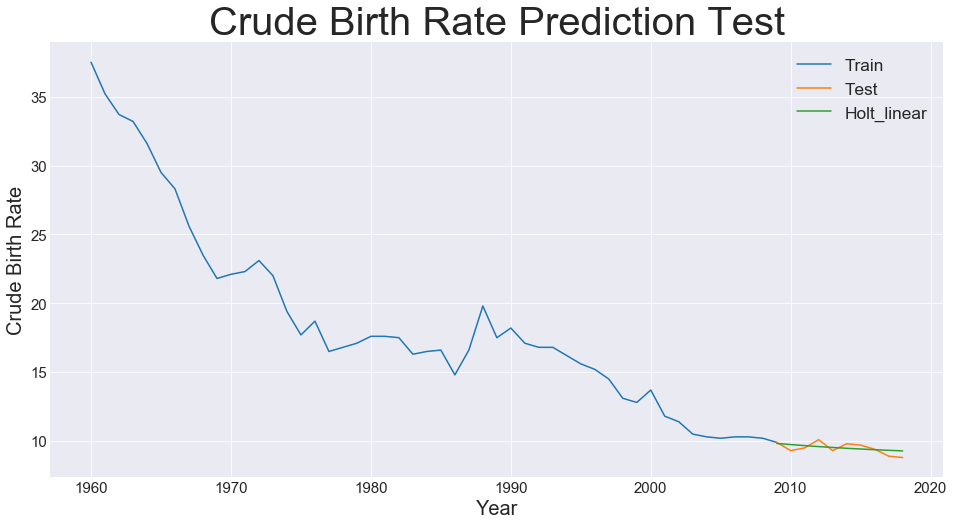

The mean squared error is 0.113610502322077


In [44]:
#Crude Birth Rate Plotting
BIRTH_RATE.index = range(1960,2019)
train, test = BIRTH_RATE.iloc[:50], BIRTH_RATE.iloc[49:]
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Birth rate']), damped = True).fit(smoothing_level = 0.5 
                                                                ,smoothing_slope = 0.3)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Birth rate'], label='Train')
plt.plot(test['Birth rate'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.xlabel("Year", fontsize=20)
plt.ylabel("Fertility Rate", fontsize=20)
plt.title("Total Fertility Rate Prediction", fontsize=40)
plt.legend(loc ='best', fontsize = 'xx-large')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Crude Birth Rate", fontsize=20)
plt.title("Crude Birth Rate Prediction Test", fontsize=40)
plt.show()
from sklearn.metrics import mean_squared_error
from math import sqrt
msr = mean_squared_error(test['Birth rate'], y_hat_avg.Holt_linear)
print("The mean squared error is", msr)

In [46]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

BIRTH_RATE.index = range(0,59)


# Split the Dataset into Train and Test
year = pd.DataFrame(BIRTH_RATE['Year']).iloc[16:]
birth_rate = pd.DataFrame(BIRTH_RATE['Birth rate']).iloc[16:]

X_train, X_test, y_train, y_test = train_test_split(year, birth_rate, test_size = 0.33)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

Intercept of Regression 	: b =  [538.43919516]
Coefficients of Regression 	: a =  [[-0.26278259]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8848498412313361
Mean Squared Error (MSE) 	: 1.401381838470714

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7140670858198013
Mean Squared Error (MSE) 	: 2.3210127753720666


here we again abandoned the early dataset for linear regression. Here, we can see, again, Holt's Method show its superiorty when predicting the trend time-series data.

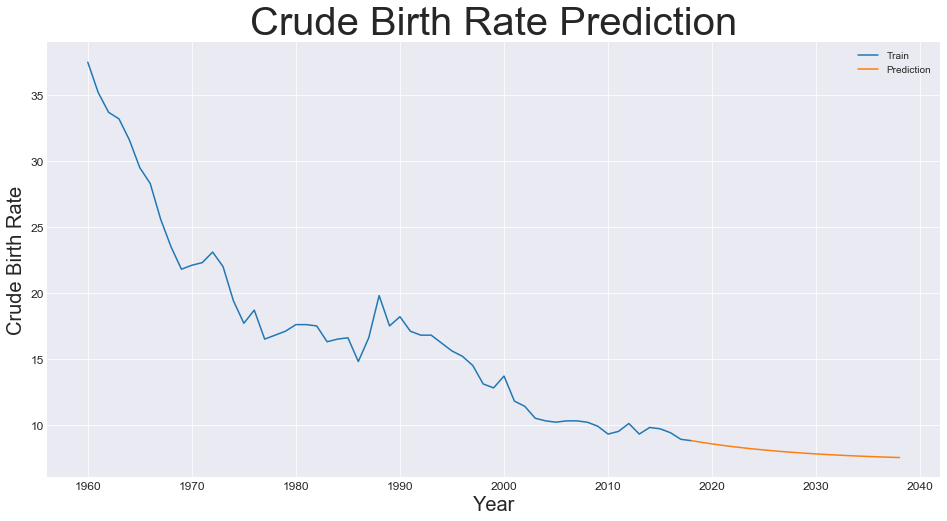

In [47]:
#crude birth rate prediction
BIRTH_RATE.index = range(1960,2019)
train = BIRTH_RATE
birth_rate_pred = pd.DataFrame()
for i in range(21):
    birth_rate_pred = birth_rate_pred.append(['0'])
birth_rate_pred.columns=['Birth rate']
birth_rate_pred.index = range(2018,2039)

fit1 = Holt(np.asarray(train['Birth rate']), damped = True).fit(smoothing_level = 0.5
                                                 ,smoothing_slope = 0.3)
birth_rate_pred['Birth rate'] = fit1.forecast(len(birth_rate_pred))

plt.figure(figsize=(16,8))
plt.plot(train['Birth rate'], label='Train')
plt.plot(birth_rate_pred['Birth rate'], label='Prediction')
plt.legend(loc ='best', fontsize = 'x-large')
plt.xlabel("Year", fontsize=20)
plt.ylabel("Crude Birth Rate", fontsize=20)
plt.title("Crude Birth Rate Prediction", fontsize=40)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend()

In [15]:
birth_rate_pred.head()

Birth rate
2018    8.801861
2019    8.672150
2020    8.553271
2021    8.444318
2022    8.344463

## Marriage RATE

In [16]:
#data cleaning for marriage rate
MARRIAGE_RATE_BY_AGE = MARRIAGE_RATE_BY_AGE.T
MARRIAGE_RATE = pd.DataFrame(MARRIAGE_RATE_BY_AGE[[4,5,17,29]])
MARRIAGE_RATE.head()

4     5     17    29
Unnamed: 1  1980  54.9  67.3   9.8
Unnamed: 2  1981  58.4  68.7  10.6
Unnamed: 3  1982  54.5  63.9   9.7
Unnamed: 4  1983  46.9  56.4     9
Unnamed: 5  1984  57.7  66.3   9.8

In [17]:
#give column name and datatype conversion
MARRIAGE_RATE.columns=['Year','Male', 'Female', 'Crude']
MARRIAGE_RATE[['Male', 'Female', 'Crude']] = MARRIAGE_RATE[['Male', 'Female', 'Crude']].astype(float)
MARRIAGE_RATE['Year'] = MARRIAGE_RATE[['Year']].astype(int)
MARRIAGE_RATE.head()
MARRIAGE_RATE.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, Unnamed: 1 to Unnamed: 39
Data columns (total 4 columns):
Year      39 non-null int32
Male      39 non-null float64
Female    39 non-null float64
Crude     39 non-null float64
dtypes: float64(3), int32(1)
memory usage: 1.4+ KB


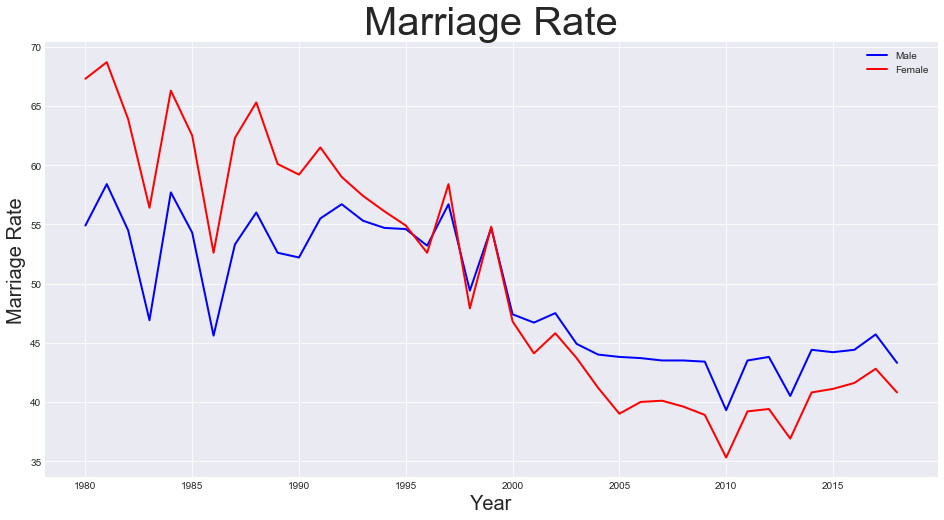

In [18]:
#Marriage Rate for Male and Female
plt.figure(figsize=(16,8))
plt.plot( 'Year', 'Male', data=MARRIAGE_RATE, marker='', color='blue', linewidth=2)
plt.plot( 'Year', 'Female', data=MARRIAGE_RATE, marker='', color='red', linewidth=2)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Marriage Rate", fontsize=20)
plt.title("Marriage Rate", fontsize=40)
plt.legend()

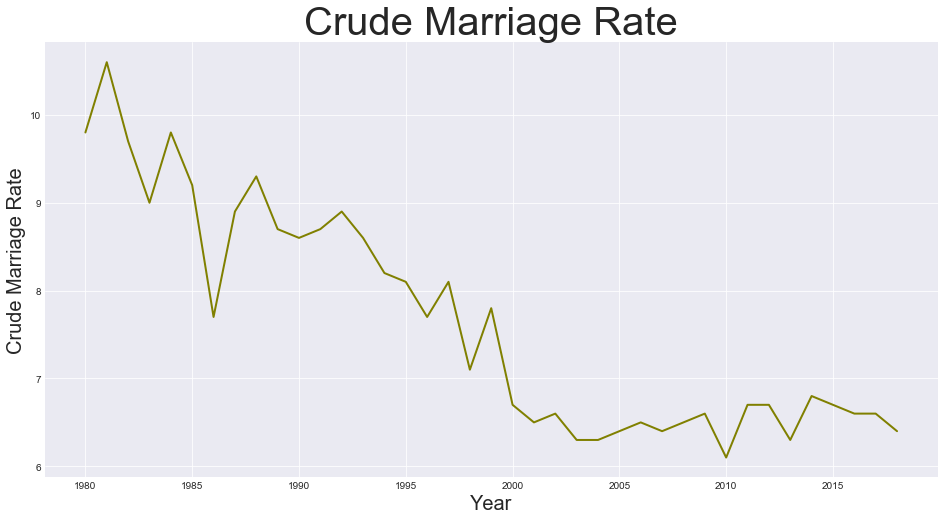

In [19]:
#crude marriage rate plotting
plt.figure(figsize=(16,8))
plt.plot( 'Year', 'Crude', data=MARRIAGE_RATE, marker='', color='olive', linewidth=2)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Crude Marriage Rate", fontsize=20)
plt.title("Crude Marriage Rate", fontsize=40)
plt.show()

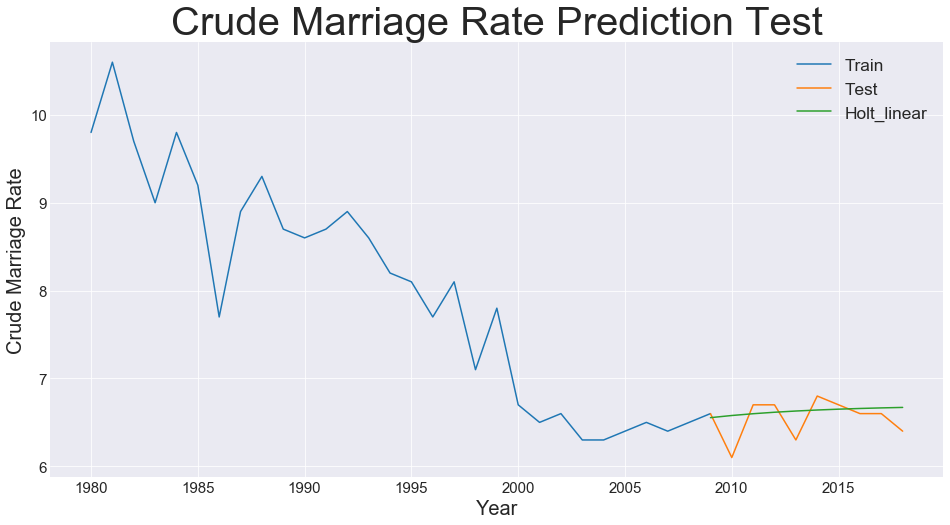

The mean squared error is 0.046543379933451326


In [20]:
#Marriage rate prediction
MARRIAGE_RATE.index = range(1980,2019)
train, test = MARRIAGE_RATE.iloc[:30], MARRIAGE_RATE.iloc[29:]
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Crude']), damped = True).fit(smoothing_level = 0.5, smoothing_slope = 0.3)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Crude'], label='Train')
plt.plot(test['Crude'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc ='best', fontsize = 'xx-large')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Crude Marriage Rate", fontsize=20)
plt.title("Crude Marriage Rate Prediction Test", fontsize=40)
plt.show()
from sklearn.metrics import mean_squared_error
from math import sqrt
mqr = mean_squared_error(test['Crude'], y_hat_avg.Holt_linear)
print("The mean squared error is", mqr)

So here we can see the marriage rate is actually increasing since 2003.

MarriageRate
2018      6.563650
2019      6.583784
2020      6.602610
2021      6.620214
2022      6.636674
2023      6.652065
2024      6.666457
2025      6.679913
2026      6.692496
2027      6.704262
2028      6.715263
2029      6.725550
2030      6.735169
2031      6.744163
2032      6.752573
2033      6.760437
2034      6.767790
2035      6.774665
2036      6.781094
2037      6.787106
2038      6.792727

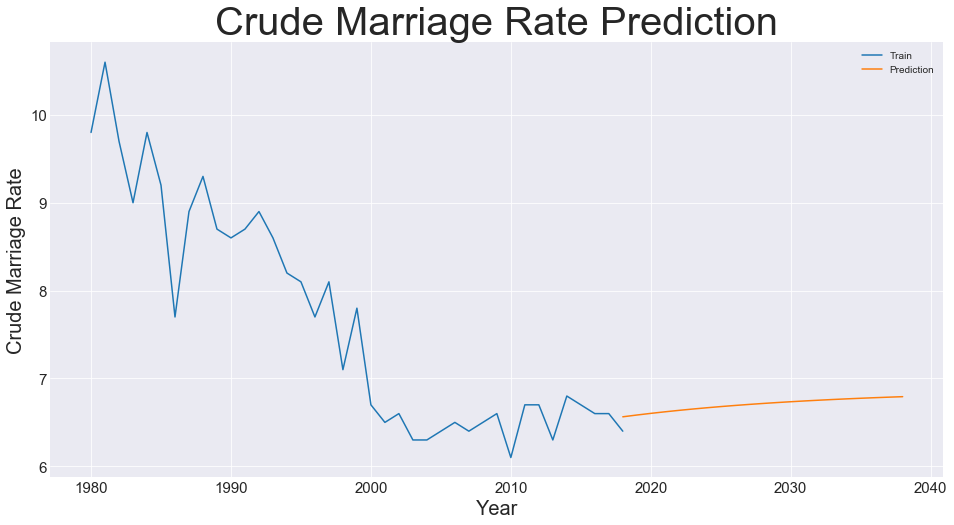

In [21]:
MARRIAGE_RATE.index = range(1980,2019)
train = MARRIAGE_RATE
marriage_rate_pred = pd.DataFrame()

for i in range(21):
    marriage_rate_pred = marriage_rate_pred.append(['0'])
marriage_rate_pred.columns=['MarriageRate']
marriage_rate_pred.index = range(2018,2039)

fit1 = Holt(np.asarray(train['Crude']), damped = True).fit(smoothing_level = 0.2 ,smoothing_slope = 0.2)
marriage_rate_pred['MarriageRate'] = fit1.forecast(len(marriage_rate_pred))

plt.figure(figsize=(16,8))
plt.plot(train['Crude'], label='Train')
plt.plot(marriage_rate_pred['MarriageRate'], label='Prediction')
plt.legend(loc ='best', fontsize = 'x-large')
plt.xlabel("Year", fontsize=20)
plt.ylabel("Crude Marriage Rate", fontsize=20)
plt.title("Crude Marriage Rate Prediction", fontsize=40)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend()
marriage_rate_pred

From prediction, the overall marriage rate will be increasing slowly. However, it doesn't mean the birth rate will be increasing as new couples are more and more unwilling to have babies nowadays.